In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

## Load the data
### Breast Cancer Wisconsin (Original) Data Set
The data can be doanloaded from the url: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.dat

In [2]:
# loading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhision',
        'single_capitheleial_size', 'bare_nuclei', 'bland_chromatin',
        'normal_nucleoli', 'mitosis', 'class']

df =pd.read_csv(url, names=names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        699 non-null    int64 
 1   clump_thickness           699 non-null    int64 
 2   uniform_cell_size         699 non-null    int64 
 3   uniform_cell_shape        699 non-null    int64 
 4   marginal_adhision         699 non-null    int64 
 5   single_capitheleial_size  699 non-null    int64 
 6   bare_nuclei               699 non-null    object
 7   bland_chromatin           699 non-null    int64 
 8   normal_nucleoli           699 non-null    int64 
 9   mitosis                   699 non-null    int64 
 10  class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Data Exploration

In [3]:
# get the rows with non numeric values

num_filter = df['bare_nuclei'].str.isnumeric().tolist()
count = 0
index = []
for i, val in enumerate(num_filter):
    if val == False:
        index.append(i)
        count = count+1
print('Number of non numeric rows: {}'.format(count))
print('Indices of non numeric rows: {}'.format(index))

Number of non numeric rows: 16
Indices of non numeric rows: [23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]


In [4]:
# print rows with non muneric values
df.loc[index].head(5)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhision,single_capitheleial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2


In [5]:
df['bare_nuclei'].replace('?', np.NaN, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype(float)
df = df.fillna(df.mean())
df.drop(['id'], 1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clump_thickness           699 non-null    int64  
 1   uniform_cell_size         699 non-null    int64  
 2   uniform_cell_shape        699 non-null    int64  
 3   marginal_adhision         699 non-null    int64  
 4   single_capitheleial_size  699 non-null    int64  
 5   bare_nuclei               699 non-null    float64
 6   bland_chromatin           699 non-null    int64  
 7   normal_nucleoli           699 non-null    int64  
 8   mitosis                   699 non-null    int64  
 9   class                     699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


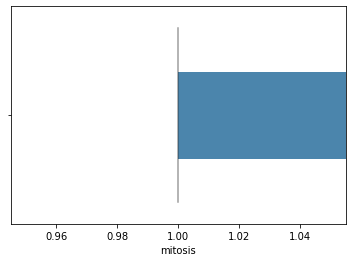

In [6]:
sns.boxenplot(df.mitosis)

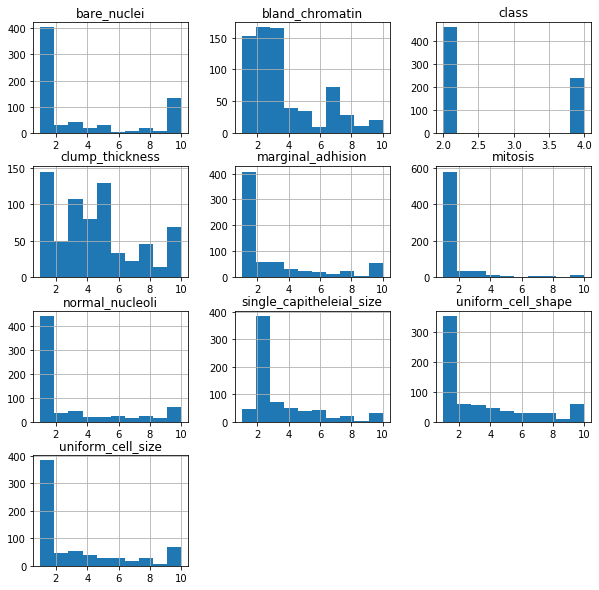

In [7]:
# histogram of the dataset
df.hist(figsize=(10, 10))
plt.show()

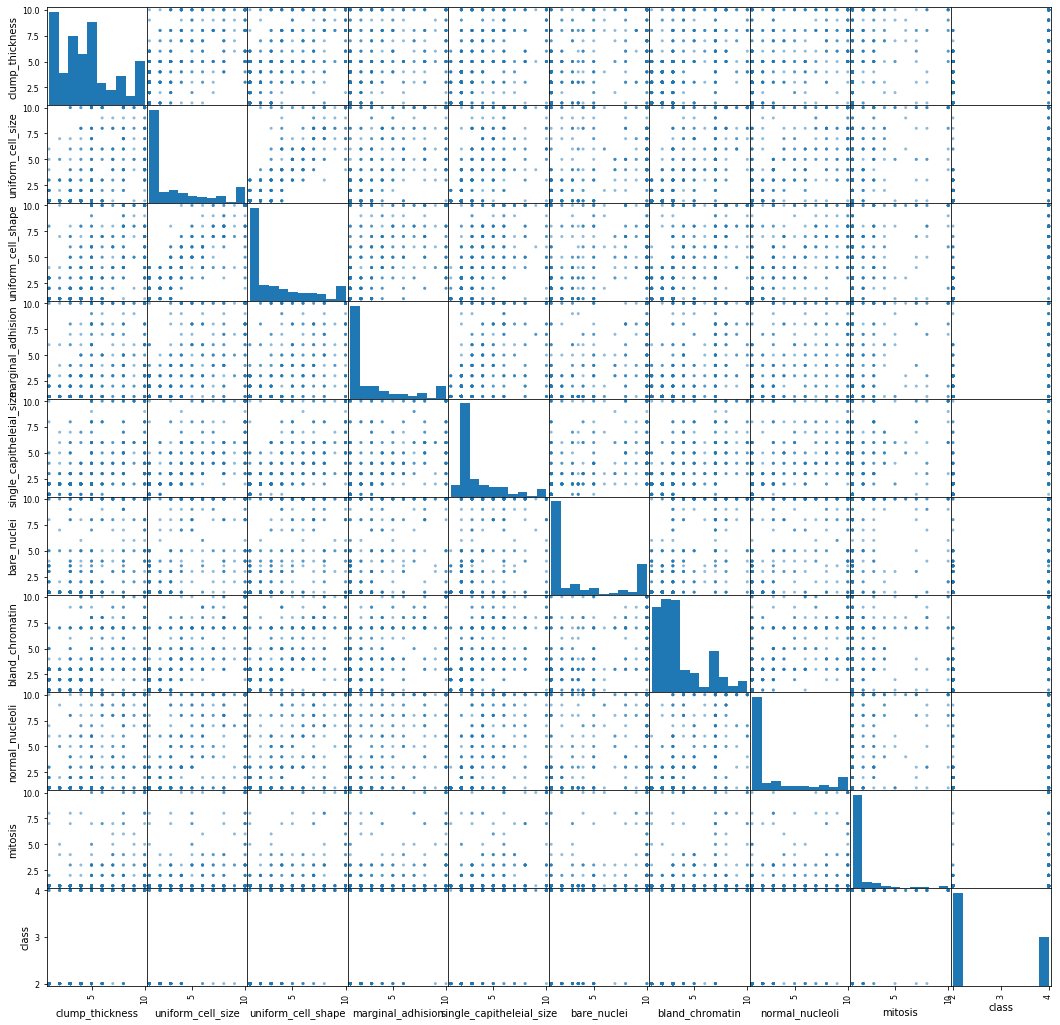

In [8]:
# creat scatter plot matrix
scatter_matrix(df, figsize=(18, 18))
plt.show()

In [9]:
# Create X and Y datasets
X = np.array(df.drop(['class'], 1))
Y = np.array(df['class'])
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)

In [10]:
# Specify testing options
seed = 8
scoring = 'accuracy'

In [11]:
# Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model
results = []
names = []
for name, model in models:
    print('Method: {}'.format(name))
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Method: KNN
KNN: 0.960682 (0.028547)
Method: SVM
SVM: 0.967825 (0.020803)


In [12]:
print(models)

[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('SVM', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [13]:
# Make prediction on the test dataset

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

KNN
0.95
              precision    recall  f1-score   support

           2       0.94      0.99      0.96        94
           4       0.98      0.87      0.92        46

    accuracy                           0.95       140
   macro avg       0.96      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140

SVM
0.9785714285714285
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        94
           4       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140



# Test the model on a random example

In [14]:
 # last element is mitosis, higher the mitosis higher the likeyhood of cancer
example = np.array([[1, 1, 1, 1, 1, 8, 5, 1, 1]])

# orignal data
#examples = X

# reshape example to make it a column vector
example = example.reshape(len(example), -1)
for name, model in models:
    prediction = model.predict(example)
    print(name)
    print(prediction)

KNN
[2]
SVM
[2]
